# K Means Clustering Algorithims Implementation

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs#Generate isotropic Gaussian blobs for clustering
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
x,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [7]:
x

array([[-2.68411196, -9.5894228 ],
       [-2.63907655, -7.82762464],
       [ 3.23215867, -2.77341304],
       ...,
       [ 8.32305593, -4.49225613],
       [ 3.91260521, -4.09905124],
       [ 4.13130687, -3.87163817]])

In [8]:
y

array([1, 1, 2, 0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 0, 0, 1, 0, 2,
       0, 2, 0, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 2,
       1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 0, 2, 0, 2, 2, 0, 2, 0, 1, 2, 1, 1,
       1, 1, 2, 2, 2, 2, 1, 0, 1, 2, 2, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 2, 0, 2, 2, 2, 1, 0, 1, 1, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1,
       0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2,
       2, 2, 1, 2, 0, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 2, 1,
       2, 0, 0, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0,
       0, 2, 1, 1, 1, 1, 2, 2, 2, 0, 1, 2, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 2, 2, 2, 1, 2, 0, 0, 1, 1,
       0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 0, 0,

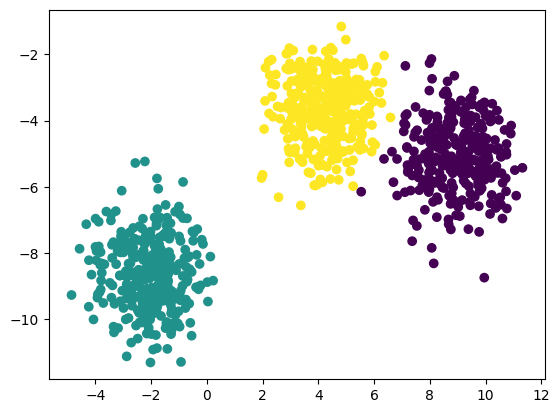

In [12]:
plt.scatter(x[:,0],x[:,1],c=y)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [16]:
from sklearn.cluster import KMeans

In [17]:
## ELbow method to select K value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

In [18]:
wcss

[17951.17034058353,
 3937.6640509133813,
 1331.4614372676576,
 1153.917223326207,
 984.8762991026615,
 851.8489666174843,
 757.6146405715759,
 669.6228531469767,
 579.0797944994268,
 530.8098510645549]

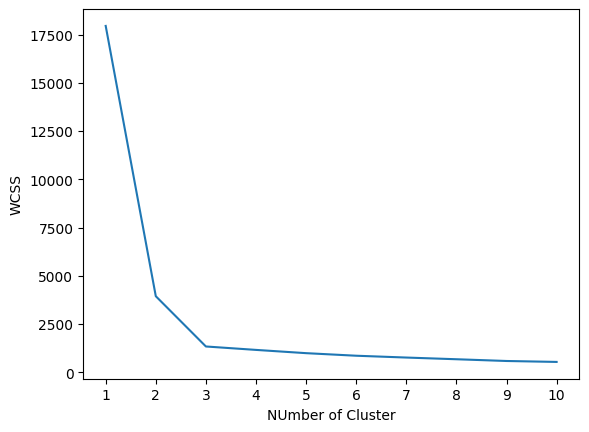

In [20]:
#PLot the Elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("NUmber of Cluster")
plt.ylabel("WCSS")
plt.show()

In [21]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [23]:
y_label=kmeans.fit_predict(x_train)

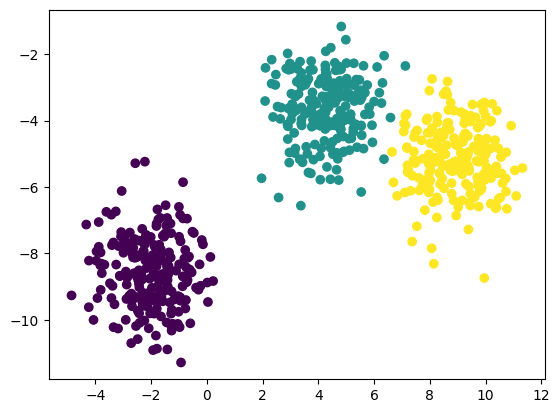

In [32]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_label)

In [34]:
# Knee Locator
!pip install kneed


In [35]:
from kneed import KneeLocator

In [38]:
k1=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [39]:
k1.elbow

3

In [40]:
# Sukgoutte Score(Performence Metrics)
from sklearn.metrics import silhouette_score

In [44]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train)
    score=silhouette_score(x_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [46]:
silhouette_coefficients

[0.6976208002524087,
 0.6850462747657435,
 0.5697482883487992,
 0.41656999804521505,
 0.33269905353886775,
 0.3342746885937182,
 0.341643566325241,
 0.343987114236343,
 0.3384038580112886]

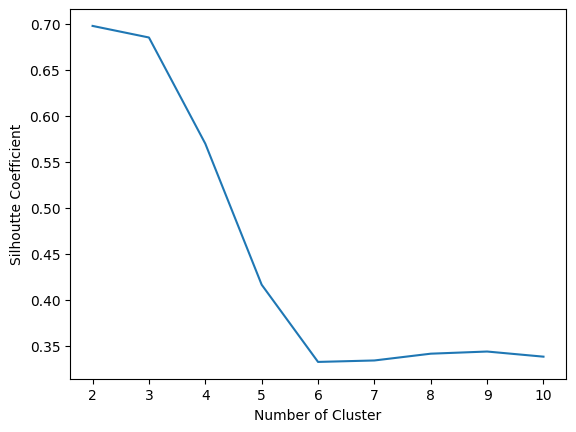

In [47]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluster")
plt.ylabel("Silhoutte Coefficient")
plt.show()